In [50]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import keras as keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Data Preprocessing

In [51]:
trent_df = pd.read_csv('trent_train.csv')
trent_df

,Date,Close,returns,returns_20d,returns_120d,returns_200d,sma_ratio_20,sma_ratio_50,sma_ratio_200,ema_12,...,macd_diff,bb_width,bb_position,rsi,volatility_20,volatility_ratio,volume_ratio,close_to_resistance,close_to_support,trend_strength_normalized
0,2017-10-25,305.70,-0.022386,0.028427,0.224024,0.514866,1.003842,1.035769,1.178846,309.863185,...,-0.449725,0.142767,0.526911,57.368799,0.022000,0.978822,0.804986,0.929321,1.086740,0.030707
1,2017-10-26,297.10,-0.028132,0.041908,0.180608,0.478109,0.973691,1.004602,1.143563,307.899618,...,-1.502776,0.131682,0.300211,51.088348,0.020878,0.927838,0.653808,0.903177,1.048712,0.031600
2,2017-10-27,292.55,-0.015315,0.001027,0.151998,0.463482,0.958732,0.987464,1.124046,305.538138,...,-2.425610,0.131413,0.185970,47.449293,0.020516,0.907832,0.734165,0.889345,1.015799,0.030349
3,2017-10-30,300.15,0.025978,0.035000,0.165631,0.498128,0.982006,1.011526,1.151040,304.709194,...,-2.437537,0.123788,0.354635,40.871369,0.021200,0.935140,0.743821,0.912449,1.038581,0.029718
4,2017-10-31,295.65,-0.014993,0.015630,0.156916,0.478250,0.966563,0.994795,1.131707,303.315472,...,-2.644539,0.119524,0.220252,39.584729,0.021527,0.945949,0.523626,0.898769,1.019483,0.029361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,2025-04-07,4740.95,-0.147748,-0.064809,-0.421260,-0.114966,0.908206,0.900571,0.751140,5309.344851,...,10.240566,0.204494,0.051118,39.888400,0.040971,1.436962,5.056200,0.824370,1.056361,-0.009335
1847,2025-04-08,4767.20,0.005537,-0.046531,-0.413214,-0.106789,0.915274,0.908053,0.755640,5225.937951,...,-28.260974,0.216293,0.108283,37.645644,0.040919,1.421217,1.863054,0.828934,1.062210,-0.008689
1848,2025-04-09,4620.20,-0.030836,-0.037398,-0.408107,-0.122694,0.888582,0.882717,0.732715,5132.747497,...,-60.420316,0.229061,0.013590,35.550508,0.040513,1.393885,0.969840,0.803373,1.029456,-0.007478
1849,2025-04-11,4780.55,0.034706,-0.043019,-0.380730,-0.114016,0.921326,0.915713,0.758515,5078.563267,...,-67.166575,0.238332,0.169896,40.261031,0.040205,1.369778,1.133471,0.831255,1.065185,-0.006653


In [53]:
training_set = trent_df[['Close', 'returns', 'returns_20d', 'returns_120d', 'returns_200d', 'sma_ratio_20', 'sma_ratio_50','sma_ratio_200', 'ema_12', 'ema_26', 'macd', 'macd_diff', 'bb_width', 'bb_position', 'rsi', 'volatility_20', 'volatility_ratio', 'volume_ratio', 'close_to_resistance', 'close_to_support', 'trend_strength_normalized']].values
training_set

array([[ 3.05700000e+02, -2.23856732e-02,  2.84272498e-02, ...,
         9.29320565e-01,  1.08674014e+00,  3.07065751e-02],
       [ 2.97100000e+02, -2.81321557e-02,  4.19077678e-02, ...,
         9.03176775e-01,  1.04871161e+00,  3.16004712e-02],
       [ 2.92550000e+02, -1.53147089e-02,  1.02651839e-03, ...,
         8.89344885e-01,  1.01579861e+00,  3.03486583e-02],
       ...,
       [ 4.62020000e+03, -3.08357107e-02, -3.73981707e-02, ...,
         8.03373326e-01,  1.02945633e+00, -7.47792303e-03],
       [ 4.78055000e+03,  3.47062898e-02, -4.30191474e-02, ...,
         8.31255434e-01,  1.06518494e+00, -6.65268641e-03],
       [ 4.87700000e+03,  2.01755028e-02, -2.75853131e-02, ...,
         8.48026430e-01,  1.08667558e+00, -4.98626205e-03]])

# Feature Scaling

In [54]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_training_set = sc.fit_transform(training_set)
scaled_training_set

array([[1.65567083e-03, 4.57023724e-01, 5.33924337e-01, ...,
        8.61040818e-01, 1.72009459e-01, 7.40341353e-01],
       [5.72874698e-04, 4.42237310e-01, 5.47756384e-01, ...,
        8.08324814e-01, 9.65972467e-02, 7.42457195e-01],
       [0.00000000e+00, 4.75218193e-01, 5.05809082e-01, ...,
        7.80434370e-01, 3.13293327e-02, 7.39494169e-01],
       ...,
       [5.44879382e-01, 4.35280727e-01, 4.66382400e-01, ...,
        6.07082422e-01, 5.84131791e-02, 6.49959105e-01],
       [5.65068493e-01, 6.03928435e-01, 4.60614846e-01, ...,
        6.63303545e-01, 1.29264565e-01, 6.51912430e-01],
       [5.77212178e-01, 5.66538916e-01, 4.76451145e-01, ...,
        6.97120367e-01, 1.71881442e-01, 6.55856837e-01]])

## Creating a Datastructure with 252 Timesteps and 21 Outputs

In [55]:
X_train = []
y_train = []
for i in range(252, 1851):
    X_train.append(scaled_training_set[i-252:i, 0:22])
    y_train.append(scaled_training_set[i, 0:22])
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 21))
X_train,y_train = np.array(X_train),np.array(y_train)

In [56]:
X_train.shape

(1599, 252, 21)

# Reshaping

*Reshaping is needed if the array is only 1d*

In [57]:
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [66]:
X_train.shape[1]

252

# Building the RNN

#### Adding Four LSTM Layers

In [67]:
regressor = Sequential()
regressor.add(Input(shape=(X_train.shape[1], 21)))
regressor.add(LSTM(units=256, return_sequences=True))
regressor.add(Dropout(0.2))

In [68]:
regressor.add(LSTM(units=128, return_sequences=True))
regressor.add(Dropout(0.2))

In [69]:
regressor.add(LSTM(units=64, return_sequences=True))
regressor.add(Dropout(0.2))

In [70]:
regressor.add(LSTM(units=32))
regressor.add(Dropout(0.2))

In [71]:
regressor.add(Dense(units=21))

## Compiling the RNN

In [72]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Making the Predictions and Visualising the Results

### Fitting the RNN Model in the Training Set

In [73]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 618ms/step - loss: 0.1229
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 643ms/step - loss: 0.0382
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 681ms/step - loss: 0.0277
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 654ms/step - loss: 0.0232
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 685ms/step - loss: 0.0192
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 679ms/step - loss: 0.0177
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 662ms/step - loss: 0.0155
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 677ms/step - loss: 0.0140
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 670ms/step - loss: 0.0135
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 659ms/step - loss: 0.0135
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 661ms/step - loss: 0.0116
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 635ms/step - loss: 0.0110
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 676ms/step - loss: 0.0106
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 664ms/step - loss: 0.0105
Epoch 15/100
50/50 ━━━━━━━━━━

In [74]:
trent_test_df = pd.read_csv('trent_test.csv')
real_stock_price = trent_test_df[['Close', 'returns', 'returns_20d', 'returns_120d', 'returns_200d', 'sma_ratio_20', 'sma_ratio_50','sma_ratio_200', 'ema_12', 'ema_26', 'macd', 'macd_diff', 'bb_width', 'bb_position', 'rsi', 'volatility_20', 'volatility_ratio', 'volume_ratio', 'close_to_resistance', 'close_to_support', 'trend_strength_normalized']]

In [75]:
trent_test_df

,Date,Close,returns,returns_20d,returns_120d,returns_200d,sma_ratio_20,sma_ratio_50,sma_ratio_200,ema_12,...,macd_diff,bb_width,bb_position,rsi,volatility_20,volatility_ratio,volume_ratio,close_to_resistance,close_to_support,trend_strength_normalized
0,2025-04-16,5035.5,0.032499,0.002608,-0.338005,-0.061207,0.971633,0.968988,0.799468,5045.699144,...,-44.393352,0.242669,0.383106,49.591871,0.041151,1.374559,0.916103,0.875587,1.121992,-0.002810
1,2025-04-17,5130.5,0.018866,-0.005630,-0.315692,-0.037249,0.990242,0.989641,0.814679,5058.745429,...,-24.841861,0.242875,0.459822,48.822755,0.040910,1.354842,0.829036,0.892106,1.143160,-0.000613
2,2025-04-21,5360.0,0.044732,0.018963,-0.286408,-0.021871,1.033543,1.037090,0.851203,5105.092286,...,3.822323,0.244265,0.637322,50.789599,0.041901,1.379013,0.734933,0.932012,1.194296,0.003310
3,2025-04-22,5323.0,-0.006903,0.017617,-0.289129,-0.034928,1.025497,1.033178,0.845456,5138.616550,...,19.679423,0.245091,0.604032,47.883722,0.041914,1.370783,0.651082,0.925578,1.186052,0.007250
4,2025-04-23,5329.0,0.001127,0.020578,-0.276094,-0.037374,1.025592,1.036037,0.846548,5167.906311,...,29.377341,0.245957,0.604049,50.085368,0.041906,1.363950,0.538330,0.926621,1.187389,0.009831
5,2025-04-24,5323.5,-0.001032,0.033679,-0.271537,-0.031051,1.022826,1.036687,0.845789,5191.843802,...,33.905564,0.246346,0.592659,43.696642,0.041754,1.352638,0.579375,0.925665,1.186163,0.013072
6,2025-04-25,5145.0,-0.033531,0.017865,-0.305696,-0.080831,0.987673,1.002442,0.817723,5184.637063,...,23.838410,0.244910,0.449668,37.089258,0.042284,1.366447,0.572118,0.894627,1.146390,0.014917
7,2025-04-28,5209.5,0.012536,0.004715,-0.281691,-0.073026,0.999821,1.015979,0.828245,5188.462130,...,20.604254,0.244813,0.499267,39.111225,0.041991,1.353649,0.552661,0.905842,1.160762,0.015907
8,2025-04-29,5391.5,0.034936,0.013069,-0.243654,-0.036243,1.034060,1.050675,0.857319,5219.698726,...,29.274043,0.245920,0.638502,46.120582,0.042303,1.361077,0.804149,0.937489,1.201315,0.015292
9,2025-04-30,5172.5,-0.040619,-0.046069,-0.276472,-0.075158,0.994440,1.008217,0.822770,5212.437383,...,19.292904,0.243663,0.477180,63.439320,0.043106,1.382372,1.489811,0.899409,1.152518,0.013741


In [77]:
complete_dataset = pd.concat((trent_df[['Close', 'returns', 'returns_20d', 'returns_120d', 'returns_200d', 'sma_ratio_20', 'sma_ratio_50','sma_ratio_200', 'ema_12', 'ema_26', 'macd', 'macd_diff', 'bb_width', 'bb_position', 'rsi', 'volatility_20', 'volatility_ratio', 'volume_ratio', 'close_to_resistance', 'close_to_support', 'trend_strength_normalized']], trent_test_df[['Close', 'returns', 'returns_20d', 'returns_120d', 'returns_200d', 'sma_ratio_20', 'sma_ratio_50','sma_ratio_200', 'ema_12', 'ema_26', 'macd', 'macd_diff', 'bb_width', 'bb_position', 'rsi', 'volatility_20', 'volatility_ratio', 'volume_ratio', 'close_to_resistance', 'close_to_support', 'trend_strength_normalized']]), axis=0)
inputs = complete_dataset[len(complete_dataset) - len(trent_test_df) - 252:].values
scaled_inputs = sc.transform(inputs)
scaled_inputs

array([[0.45449738, 0.49531913, 0.49181365, ..., 0.8412568 , 0.03062546,
        0.75971331],
       [0.46945508, 0.59295896, 0.50897058, ..., 0.94330954, 0.09192797,
        0.74835694],
       [0.47357222, 0.53554949, 0.51633839, ..., 0.95921686, 0.10880164,
        0.73736216],
       ...,
       [0.66484312, 0.5365099 , 0.57635171, ..., 0.97995772, 0.199538  ,
        0.71633563],
       [0.66308043, 0.50816086, 0.53663336, ..., 0.97495161, 0.19405511,
        0.71522512],
       [0.67541927, 0.55998663, 0.60086681, ..., 0.99203976, 0.23243533,
        0.71916771]])

In [86]:
X_test = []
for i in range(252, 283):
    X_test.append(scaled_inputs[i-252:i, 0:22])
X_test = np.array(X_test)
X_train = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


In [87]:
predicted_stock_price

array([[ 4.19568311e+03, -7.44508160e-03, -6.04928508e-02,
        -2.83518136e-01, -3.64018194e-02,  9.31184590e-01,
         9.27012384e-01,  8.02891254e-01,  4.44958643e+03,
         4.62782324e+03, -1.47303970e+02, -4.77495346e+01,
         2.80878097e-01,  2.94596195e-01,  3.85457001e+01,
         3.64750586e-02,  1.42396832e+00,  1.05653763e+00,
         8.14797938e-01,  1.08610117e+00, -2.17851326e-02],
       [ 4.21854541e+03, -3.89130530e-03, -2.11936440e-02,
        -2.64714032e-01,  1.61800813e-02,  9.59780812e-01,
         9.54992414e-01,  8.30683053e-01,  4.41885059e+03,
         4.58683594e+03, -1.36886658e+02, -3.44322014e+01,
         2.77554989e-01,  4.21784490e-01,  4.18274002e+01,
         3.59017029e-02,  1.39867747e+00,  1.12067509e+00,
         8.38721871e-01,  1.11350787e+00, -2.08079852e-02],
       [ 4.27222266e+03, -5.79017797e-04,  1.84322577e-02,
        -2.56485879e-01,  6.80203289e-02,  9.88834143e-01,
         9.82997179e-01,  8.55883300e-01,  4.41029053e

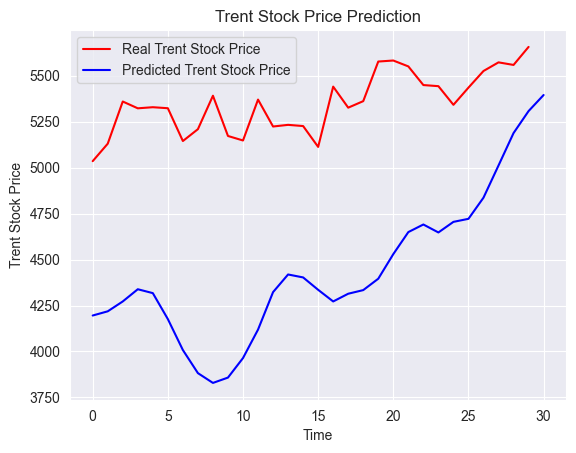

In [88]:
plt.plot(real_stock_price['Close'], color = 'red', label = 'Real Trent Stock Price')
plt.plot(predicted_stock_price[:,0], color = 'blue', label = 'Predicted Trent Stock Price')
plt.title('Trent Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Trent Stock Price')
plt.legend()
plt.show()